In [6]:
import TS_VariableScaling as TS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Best solution (Portfolio) for each value of lambda (51 values)
def Solutions(ReturnSD_path, corr_path):
    Lambda_values =  np.arange(0,1.02, 0.02)
    Solutions = []
    Return = []
    Risk = []
    for Lambda_value in Lambda_values:
        T_POP = TS.POP(ReturnSD_path= ReturnSD_path ,
                            corr_path= corr_path ,Lambda= round(Lambda_value,3),
                            k=10, epsilon=0.01, delta=1)
        Best_solution, Best_objval = T_POP.t2_runner()
        obj1 = T_POP.Objfun(Best_solution, Return='Obj1')
        obj2 = T_POP.Objfun(Best_solution, Return='Obj2')
        Solutions.append(Best_solution)
        Risk.append(round(obj1,10))
        Return.append(round(obj2,10))
    df = pd.DataFrame(list(zip(Return, Risk)), columns=['Return', 'Risk'])
    return Solutions, df
       

In [18]:
solutions, portcef = Solutions("Data/Hong_Kong_31/Return&SD.txt", "Data/Hong_Kong_31/correlation.txt")

st non-improving => Admissible


### iter 141###  Current_Objvalue: 0.0006916439487227911, Best_Objvalue: 0.0006432633869436808
   Candidate Move: I asset 28, Objvalue: 0.0006891621446919557 => Tabu => Inadmissible
   Candidate Move: D asset 2, Objvalue: 0.0006922393223893133 => Tabu => Inadmissible
   Candidate Move: D asset 13, Objvalue: 0.0006925506557206769 => Tabu => Inadmissible
   Candidate Move: I asset 26, Objvalue: 0.0006927348606031024 => Least non-improving => Admissible


### iter 142###  Current_Objvalue: 0.0006927348606031024, Best_Objvalue: 0.0006432633869436808
   Candidate Move: I asset 28, Objvalue: 0.0006901456361119323 => Least non-improving => Admissible


### iter 143###  Current_Objvalue: 0.0006901456361119323, Best_Objvalue: 0.0006432633869436808
   Candidate Move: I asset 28, Objvalue: 0.0006877586011850169 => Tabu => Inadmissible
   Candidate Move: D asset 2, Objvalue: 0.0006907977040267883 => Least non-improving => Admissible


### iter 144###  Current_Objva

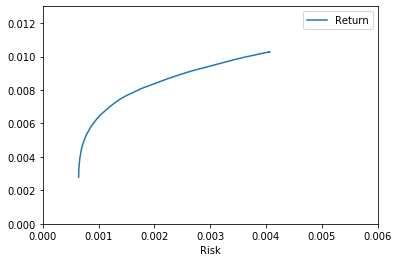

In [19]:
# Constrained Efficient frontier
portcef.plot(x = "Risk", y ='Return')
plt.xlim([0, 0.006]);
plt.ylim([0, 0.013]);

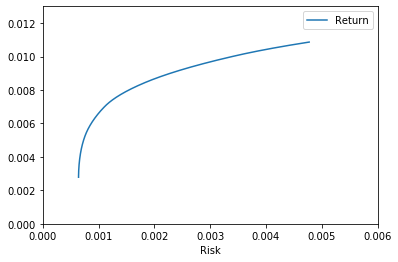

In [20]:
# Unconstrained Efficient frontier
portef = pd.read_csv("Data\Hong_Kong_31\portef.txt", sep='\t', header=None,names = ['Return', 'Risk'])
portef.plot(x = "Risk", y ='Return')
plt.xlim([0, 0.006]);
plt.ylim([0, 0.013]);

In [39]:
# Variance error
ef_variances = []

for i in portcef.Return:
    col = portef[round(portef.Return,7) == round(i,7)].values.tolist()
    if len(col)== 0:
        col = portef[round(portef.Return,6) == round(i,6)].values.tolist()
        if len(col) == 0:
            col = portef[round(portef.Return,5) == round(i,5)].values.tolist()
    sum = 0
    for item in col:
        sum += item[1]
    ef_Risk = sum/len(col)

    ef_variances.append(ef_Risk)
# Return Error
ef_returns = []
for i in portcef.Risk:
    col = portef[round(portef.Risk,7) == round(i,7)].values.tolist()
    if len(col)== 0:
        col = portef[round(portef.Risk,5) == round(i,5)].values.tolist()
    sum = 0
    for item in col:
        sum += item[0]
    ef_Return = sum/len(col)
    ef_returns.append(ef_Return)
    
portcef['ef_Return'] =  ef_returns
portcef['ef_Risk'] = ef_variances


In [40]:
portcef.head()

,Return,Risk,ef_Return,ef_Risk,Return_Error,Risk_Error
0,0.010269,0.004057,0.010461,0.003767,1.835519,7.705192
1,0.010269,0.004063,0.010461,0.003767,1.829953,7.863156
2,0.010275,0.004066,0.010467,0.003773,1.830630,7.495313
3,0.010263,0.004057,0.010461,0.003755,1.888841,8.111532
4,0.010268,0.004068,0.010467,0.003767,1.902945,7.989330


In [41]:
# Return Error
portcef = portcef.assign(Return_Error = lambda portcef : 100 * (portcef.ef_Return - portcef.Return) / portcef.ef_Return)
#Variance Error
portcef = portcef.assign(Risk_Error = lambda portcef : 100 * (portcef.Risk - portcef.ef_Risk) /portcef.ef_Risk)

In [42]:
portcef.head()

,Return,Risk,ef_Return,ef_Risk,Return_Error,Risk_Error
0,0.010269,0.004057,0.010461,0.003767,1.835519,7.705192
1,0.010269,0.004063,0.010461,0.003767,1.829953,7.863156
2,0.010275,0.004066,0.010467,0.003773,1.830630,7.750728
3,0.010263,0.004057,0.010461,0.003755,1.888841,8.026271
4,0.010268,0.004068,0.010467,0.003767,1.902945,7.989330


In [31]:
print("Variance of return error: {}\nMean return error: {}".format(round(portcef.Risk_Error.mean(),4),
round(portcef.Return_Error.mean(),4)))

Variance of return error: 6.8402
Mean return error: 2.4577


In [36]:
print("Variance of return error: {}\nMean return error: {}".format(round(portcef.Risk_Error.mean(),4),
round(portcef.Return_Error.mean(),4)))

Variance of return error: 6.8367
Mean return error: 2.4577


In [43]:
print("Variance of return error: {}\nMean return error: {}".format(round(portcef.Risk_Error.mean(),4),
round(portcef.Return_Error.mean(),4)))

Variance of return error: 6.8402
Mean return error: 2.4577
